<a href="https://colab.research.google.com/github/venidaydream/Data-Science/blob/main/Data_science_29_nov_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
#generar un conjunto de numeros aleatorios
np.random.seed(123)
datos = np.random.randn(20, 2)
datos

array([[-1.0856306 ,  0.99734545],
       [ 0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654],
       [-2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  ],
       [-0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609],
       [ 1.0040539 ,  0.3861864 ],
       [ 0.73736858,  1.49073203],
       [-0.93583387,  1.17582904],
       [-1.25388067, -0.6377515 ],
       [ 0.9071052 , -1.4286807 ],
       [-0.14006872, -0.8617549 ],
       [-0.25561937, -2.79858911],
       [-1.7715331 , -0.69987723],
       [ 0.92746243, -0.17363568],
       [ 0.00284592,  0.68822271],
       [-0.87953634,  0.28362732]])

In [7]:
#calcular inertia

centroid =np.mean(datos,axis=0)
centroid

array([-0.08125899, -0.08550168])

# Paso 1 - centrando los datos

In [9]:
inertia=np.sum((datos-centroid)**2)
inertia

54.39924411487566

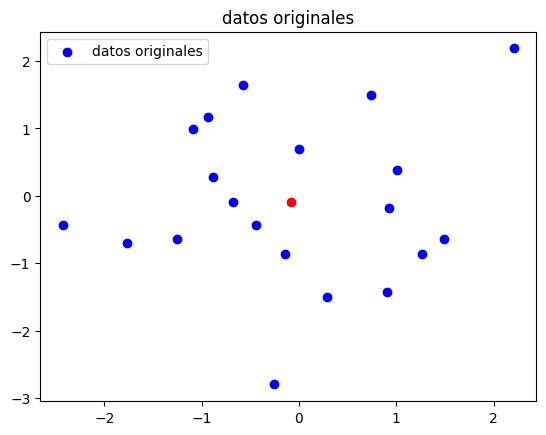

In [11]:
#grafica
plt.scatter(datos[:,0],datos[:,1], c='blue', marker = 'o', label = 'datos originales')
plt.plot(centroid[0],centroid[1], 'or')
plt.title('datos originales')
plt.legend()
plt.show()

# Paso 2: seleccionar centroides aleatorios
tres puntos aleatorios que sirveran como centros


In [12]:
np.random.seed(567)
sel=np.random.choice(range(len(datos)), 3)
sel

array([ 3, 15, 12])

In [13]:
centroides_iniciales = datos[sel,:]
centroides_iniciales

array([[-2.42667924, -0.42891263],
       [-0.25561937, -2.79858911],
       [-1.25388067, -0.6377515 ]])

the same but shorter

In [14]:
np.random.seed(567)
centroides_iniciales = datos[np.random.choice(range(len(datos)), 3),:]
centroides_iniciales

array([[-2.42667924, -0.42891263],
       [-0.25561937, -2.79858911],
       [-1.25388067, -0.6377515 ]])

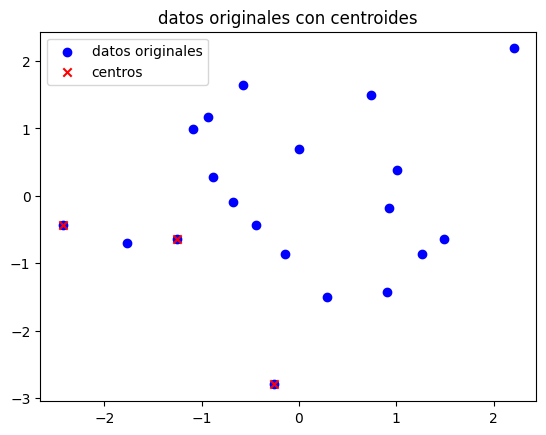

In [19]:
#grafica
plt.scatter(datos[:,0],datos[:,1], c='blue', marker = 'o', label = 'datos originales')
plt.scatter(centroides_iniciales[:,0],centroides_iniciales[:,1], c='red', marker='x', label='centros')
plt.title('datos originales con centroides')
plt.legend()
plt.show()

# Paso 3 - calcular las distancias

        [1.95770875, 2.91598992, 2.78266933, 0.        , 3.7184812 ,
        1.77945856, 3.92369204, 1.98270474, 5.32005159, 3.52623259,
        3.70084237, 2.19039169, 1.19124732, 3.48046762, 2.32721725,
        3.21385556, 0.70896987, 3.36384195, 2.67405757, 1.70333917] -> GRUPO 1

EL PRIMER PUNTO es el menor en el tercer grupo

1.95770875 vs 3.88561935 vs 1.64373055

In [23]:
distancia = np.linalg.norm(datos - centroides_iniciales[:,np.newaxis,:], axis=2)
distancia

array([[1.95770875, 2.91598992, 2.78266933, 0.        , 3.7184812 ,
        1.77945856, 3.92369204, 1.98270474, 5.32005159, 3.52623259,
        3.70084237, 2.19039169, 1.19124732, 3.48046762, 2.32721725,
        3.21385556, 0.70896987, 3.36384195, 2.67405757, 1.70333917],
       [3.88561935, 1.40004016, 4.46173115, 3.21385556, 2.45909962,
        2.73680883, 2.77782088, 2.37172953, 5.55996327, 3.42484624,
        4.40276059, 4.03220677, 2.3802825 , 1.79682427, 1.940278  ,
        0.        , 2.5889353 , 2.87924695, 3.49637826, 3.14473059],
       [1.64373055, 1.76530547, 2.38671019, 1.19124732, 2.53020024,
        0.79089436, 2.74527053, 0.83504944, 4.46635232, 2.47925741,
        2.91470679, 1.84125722, 0.        , 2.30117989, 1.1361138 ,
        2.3802825 , 0.5213671 , 2.23017067, 1.82690156, 0.9945213 ]])

assign groups


In [25]:
cluster_asignado = np.argmin(distancia,axis=0)
cluster_asignado

array([2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2])

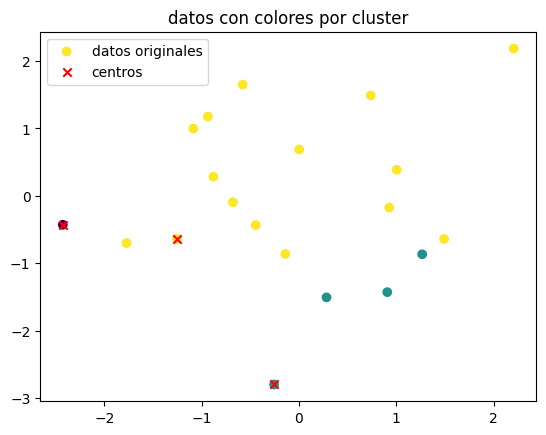

In [29]:
#graficar segun cluster
plt.scatter(datos[:,0],datos[:,1], c=cluster_asignado, marker = 'o', label = 'datos originales')
plt.scatter(centroides_iniciales[:,0],centroides_iniciales[:,1], c='red', marker='x', label='centros')
plt.title('datos con colores por cluster')
plt.legend()
plt.show()

In [38]:
#calcular inertia de los nuevos grupos
datos_cluster_0 = datos[cluster_asignado == 0]
inertia0=np.sum((datos_cluster_0-centroides_iniciales[0])**2)
inertia0

0.0

In [39]:
#calcular inertia de los nuevos grupos
datos_cluster_1 = datos[cluster_asignado == 1]
inertia1=np.sum((datos_cluster_1-centroides_iniciales[1])**2)
inertia1

11.235860859235224

In [40]:
#calcular inertia de los nuevos grupos
datos_cluster_2 = datos[cluster_asignado == 2]
inertia2=np.sum((datos_cluster_2-centroides_iniciales[2])**2)
inertia2

66.10121300009058

In [41]:
inertia_nueva = inertia0+inertia1+inertia2
inertia_nueva

77.33707385932581

# Primera iteracion

In [46]:
#los nuevos centroides

nuevos1_centroides = np.array([np.mean(datos[cluster_asignado==i], axis=0)
                              for i in range(len(centroides_iniciales))])

nuevos1_centroides

array([[-2.42667924, -0.42891263],
       [ 0.55010015, -1.65007623],
       [-0.09326008,  0.35461227]])

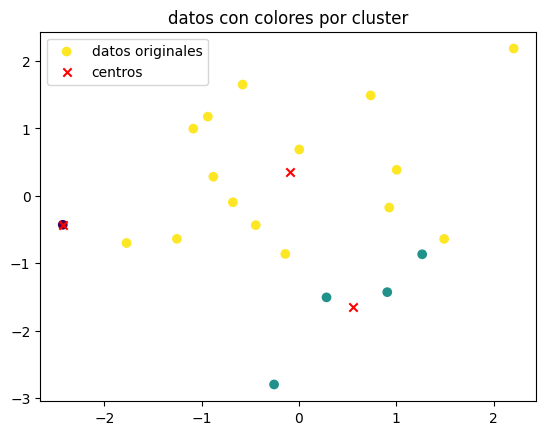

In [47]:
#graficar segun cluster
plt.scatter(datos[:,0],datos[:,1], c=cluster_asignado, marker = 'o', label = 'datos originales')
plt.scatter(nuevos1_centroides[:,0],nuevos1_centroides[:,1], c='red', marker='x', label='centros')
plt.title('datos con colores por cluster')
plt.legend()
plt.show()

In [51]:
distancias_nuevos1=np.linalg.norm(datos-nuevos1_centroides[:,np.newaxis,:], axis=2)
distancias_nuevos1

array([[1.95770875, 2.91598992, 2.78266933, 0.        , 3.7184812 ,
        1.77945856, 3.92369204, 1.98270474, 5.32005159, 3.52623259,
        3.70084237, 2.19039169, 1.19124732, 3.48046762, 2.32721725,
        3.21385556, 0.70896987, 3.36384195, 2.67405757, 1.70333917],
       [3.11198596, 0.30335969, 3.48911896, 3.21752328, 1.0611486 ,
        1.98231547, 1.38148443, 1.57040963, 4.17890958, 2.08625011,
        3.14638618, 3.19276377, 2.06861019, 0.42008164, 1.04775168,
        1.40294895, 2.50855717, 1.52390255, 2.40148478, 2.40480143],
       [1.18233041, 1.89856005, 1.38466901, 2.4614541 , 1.8273251 ,
        0.73813784, 1.87034362, 0.86340565, 2.93992114, 1.09776814,
        1.40737773, 1.17657452, 1.52703176, 2.04471624, 1.21726748,
        3.15737857, 1.98205663, 1.14931298, 0.3471776 , 0.78947402]])

In [52]:
cluster_asignado2=np.argmin(distancias_nuevos1, axis=0)
cluster_asignado2

array([2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2])

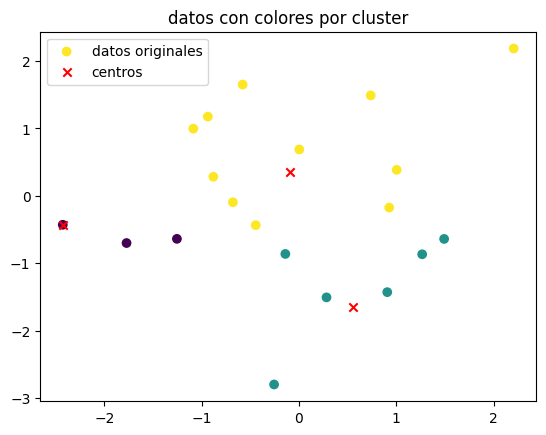

In [54]:
#graficar segun cluster
plt.scatter(datos[:,0],datos[:,1], c=cluster_asignado2, marker = 'o', label = 'datos originales')
plt.scatter(nuevos1_centroides[:,0],nuevos1_centroides[:,1], c='red', marker='x', label='centros')
plt.title('datos con colores por cluster')
plt.legend()
plt.show()